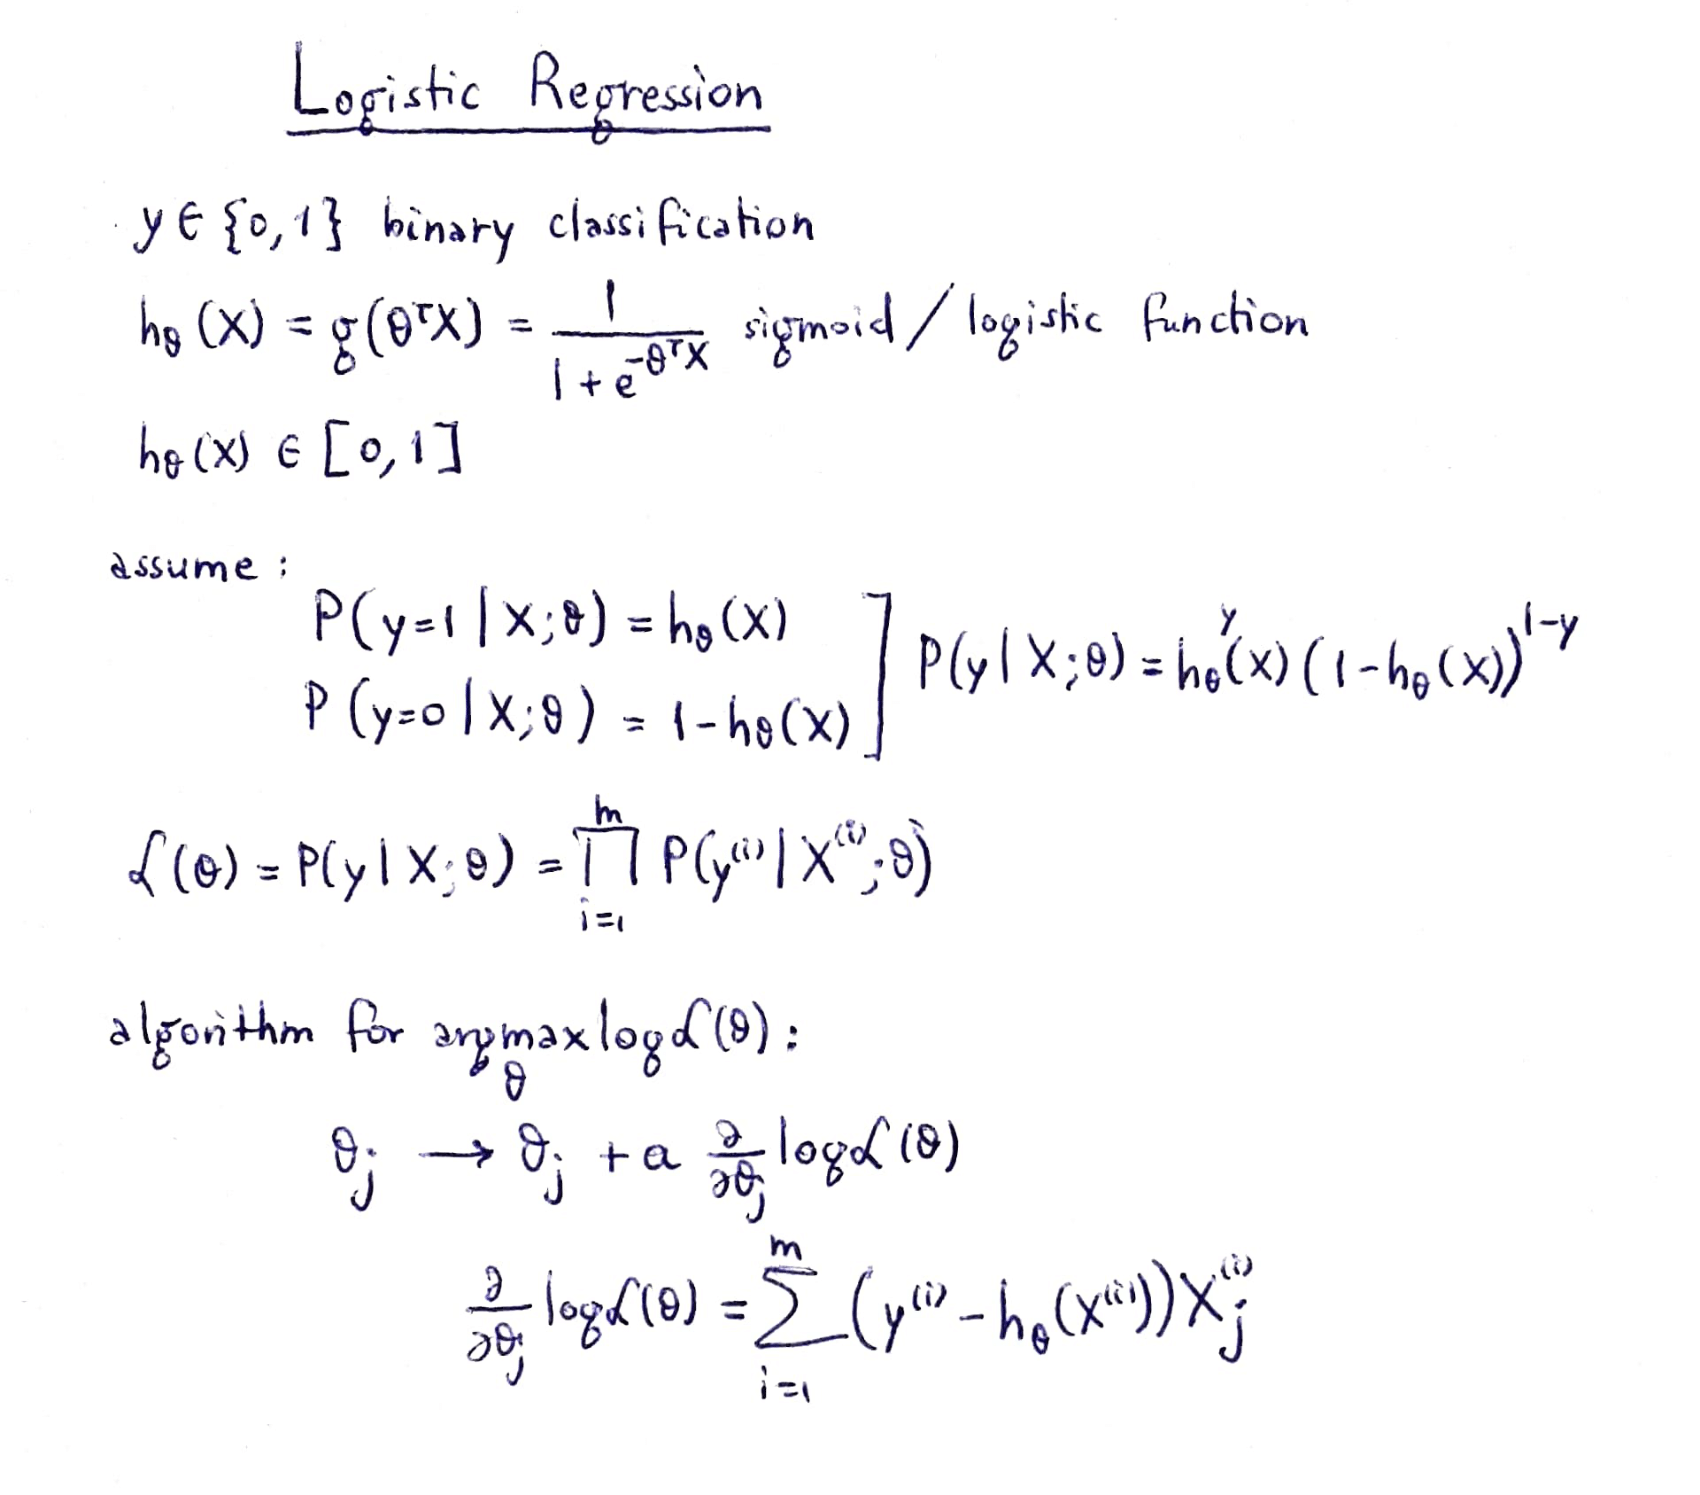

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris(as_frame=True)
iris_X = iris.data
iris_y = iris.target
pd.concat([iris_X, iris_y], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


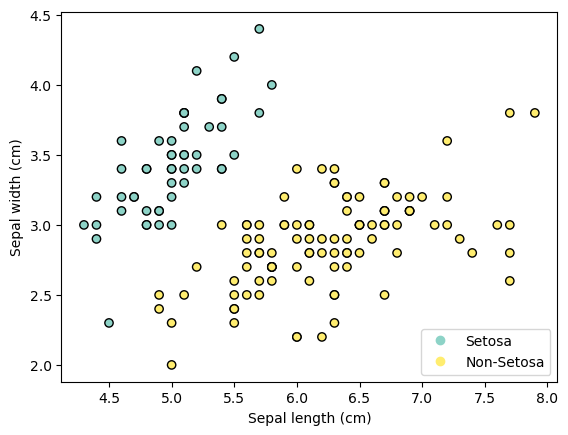

In [4]:
iris_y[iris_y == 2] = 1
p1 = plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1], c=iris_y, edgecolor='k', cmap=plt.cm.Set3)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Text(0, 0.5, 'sigmoid(z)')

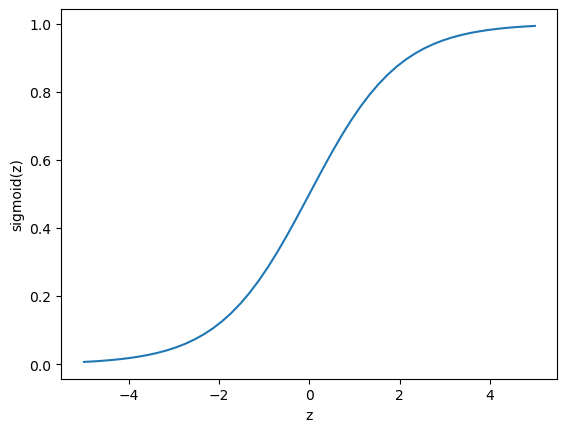

In [6]:
z = np.linspace(-5,5)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

In [7]:
def h(X, theta):
    return sigmoid(X.dot(theta))

In [8]:
def log_likelihood(X, y, theta):
    return (y*np.log(h(X,theta)+1e-6) + (1-y)*np.log(1-h(X,theta)+1e-6)).mean()

In [12]:
def log_likelihood_gradient(X, y, theta):
    return np.mean((h(X,theta)-y)*X.T, axis=1)

In [16]:
threshold = 5e-5
lr = 1e-1
theta, theta_prev = np.zeros((3,)), np.ones((3,))
thetas = [theta]
iter = 0
iris_X['one'] = 1
X_train = iris_X.iloc[:, [0,1,-1]].to_numpy()
y_train = iris_y.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(X_train, y_train, theta)))
    theta_prev = theta
    gradient = log_likelihood_gradient(X_train, y_train, theta)
    theta = theta_prev - lr * gradient
    thetas += [theta]
    iter += 1

Iteration 0. Log-likelihood: -0.693145
Iteration 50000. Log-likelihood: -0.021506
Iteration 100000. Log-likelihood: -0.015329
Iteration 150000. Log-likelihood: -0.012062
Iteration 200000. Log-likelihood: -0.010076


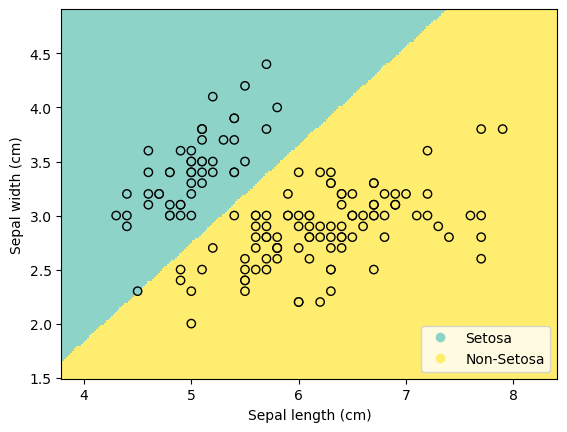

In [28]:
xmin = iris_X.iloc[:,0].min() - 0.5
xmax = iris_X.iloc[:,0].max() + 0.5
ymin = iris_X.iloc[:,1].min() - 0.5
ymax = iris_X.iloc[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(xmin,xmax,0.02), np.arange(ymin,ymax,0.02))
Z = h(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z > 0.5] = 1
Z[Z < 0.5] = 0
Z = Z.reshape(xx.shape)
# pcolormesh() - create a pseudocolor plot
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)
p1 = plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1], c=iris_y, edgecolor='k', cmap=plt.cm.Set3)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')